# Reinforcement Learning for Robotic Task Recognition in Event-Driven Environments

This project will implement a **Reinforcement Learning (RL)** algorithm to enable a **robotic arm** to interact with the right box based on observable events. The objective is to develop an RL-based system in which a robot can recognize and respond to **complex, sequential decision-making scenarios** within a dynamic, event-driven environment. Specifically, the robot will control a robotic arm that reacts to these changing situations.

To achieve this, we will use **simulations like PyBullet** for robotic tasks and the **Open the Chests (OtC) environment** to tackle complex sequential decision-making challenges. The Open the Chests environment provides a **sequential event-based world** where the robot can observe and make informed decisions. Meanwhile, PyBullet will be used to **simulate the control of a robotic arm**, enabling it to physically respond to situations and manipulate objects.

The goal is to develop a system where the robot can autonomously **identify event patterns, make decisions, and take actions** to interact with its environment effectively.


## Relevant Documentation and Libraries

To better understand and implement the project, the following resources and libraries are recommended:

### Reinforcement Learning Libraries:
- **Stable Baselines3**: RL framework with pre-implemented algorithms. [📖 Documentation](https://stable-baselines3.readthedocs.io/en/master/)
- **Gymnasium (formerly OpenAI Gym)**: Toolkit for developing RL environments. [📖 Documentation](https://gymnasium.farama.org/)
- **RL Baselines3 Zoo**: Collection of pre-trained RL agents. [📖 GitHub](https://github.com/DLR-RM/rl-baselines3-zoo)

### Robotic Simulation:
- **PyBullet**: Physics engine for robotic simulations. [📖 Documentation](https://pybullet.org/) [📖 Quicktart Guide](https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit?tab=t.0)
- **KUKA Arm (KukaBulletEnv-v0)**: PyBullet environment for KUKA robot arm control. [📖 Example](https://github.com/bulletphysics/bullet3/tree/master/examples/pybullet/gym/pybullet_envs) [📖 Example](https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/__init__.py)
- **Reacher**: Simulated environment for reaching tasks. [📖 Documentation](https://www.gymlibrary.dev/environments/mujoco/reacher/)

### Open the Chests (OtC) Environment:
- **OtC Environment Overview**: Sequential event-based RL scenario. [📖  GitHub ](https://github.com/ThalesGroup/open-the-chests) [📖 Article ](https://drops.dagstuhl.de/entities/document/10.4230/LIPIcs.TIME.2024.5) [📖 Presentation ](https://www.lirmm.fr/time2024/files/OpenTheChestsTIME2024.pdf)



In [14]:
# %pip install numpy==1.21.0
# %pip install sb3-contrib
# %pip install 'shimmy>=2.0'

In [15]:
# %pip install pybullet
# %pip install imageio
# %pip install tensorboard
# %pip install openthechests
# %pip install gym matplotlib
# %pip install imageio-ffmpeg

## 1. RL Environment with PyBullet

### **Goal**
The objective of this section is to **set up a RL environment** using **PyBullet**, where a robotic arm learns to **reach for a specific chest** based on input commands. The robot must **autonomously decide and execute movements** to successfully complete the task.

### **Steps**:
1. **Multi-goal KUKA environment**  
   - The robot will be trained to interact with multiple chests or boxes.  
   - It will **make decisions based on environmental observations and task-related commands**.
  
2. **Training the RL model**  
   - The robotic arm will learn to **reach and interact with the chosen chest**.  
   - A **reinforcement learning algorithm** will be implemented to optimize its movements.

### **Suggested Approach**

Set up a **robotic environment** using **PyBullet** and implement either the **KUKA (KukaBulletEnv-v0)** or **Reacher (ReacherBulletEnv-v0)** robot arm models to simulate its ability to interact with the environment. The robot must learn to **respond to commands** to reach for different objects. Upon receiving a command to reach for a **specific object**, the RL agent must adjust the robot’s movements to successfully complete the task according to the given instruction.

Multiple objects should be **manually added** to the simulation environment, and appropriate **reward and success functions** must be defined for the agent’s interactions. The agent should be **trained** to learn how to reach for the objects based on the given commands.

To implement this, you must:
- **Use PyBullet** to create a **physics simulation** of the robot arm along with multiple objects.
- **Define an RL agent** that learns from rewards and successfully completes the reaching task.
- **Train the agent** and **evaluate its performance** to optimize learning.

### **References**
- **Gymnasium (formerly OpenAI Gym) Documentation**  
  - [Environment Creation Tutorial](https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/)  
  - [Gym Library Environment Creation](https://www.gymlibrary.dev/content/environment_creation/)  

- **Custom PyBullet Robot Arm Projects**  
  - [PyBullet Tutorial](https://www.etedal.net/2020/04/pybullet-panda_2.html)  
  - [Multi-Goal PyBullet Gym](https://github.com/IanYangChina/pybullet_multigoal_gym/tree/master)  

# Training a model to reach chests given inputs
For this first task, we tried 2 approaches for the training of the agent, with two reward constructions and two training algorithm.

- an agent train with **SAC**, with reward of -dist and a reward for reaching the goal. An episode is consider a success if the arm is touching the box for 1 frames.
- an agent train with **PPO**, with reward of -dist, a penalty for moving the box, and a reward for reaching the goal. An episode is consider a success if the arm is touching the box for more than 5 frames.

In [16]:
# %pip uninstall numpy
# %pip install -U numpy==1.23.3

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

Processing run: PPO
Found 1 event file(s)
Available tags/metrics: ['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'rollout/success_rate', 'time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/std', 'train/value_loss', 'eval/mean_reward', 'eval/success_rate']
Processing run: SAC_2
Found 1 event file(s)
Available tags/metrics: ['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'rollout/success_rate', 'time/fps', 'train/actor_loss', 'train/critic_loss', 'train/ent_coef', 'train/ent_coef_loss', 'train/learning_rate', 'eval/mean_reward', 'eval/success_rate']


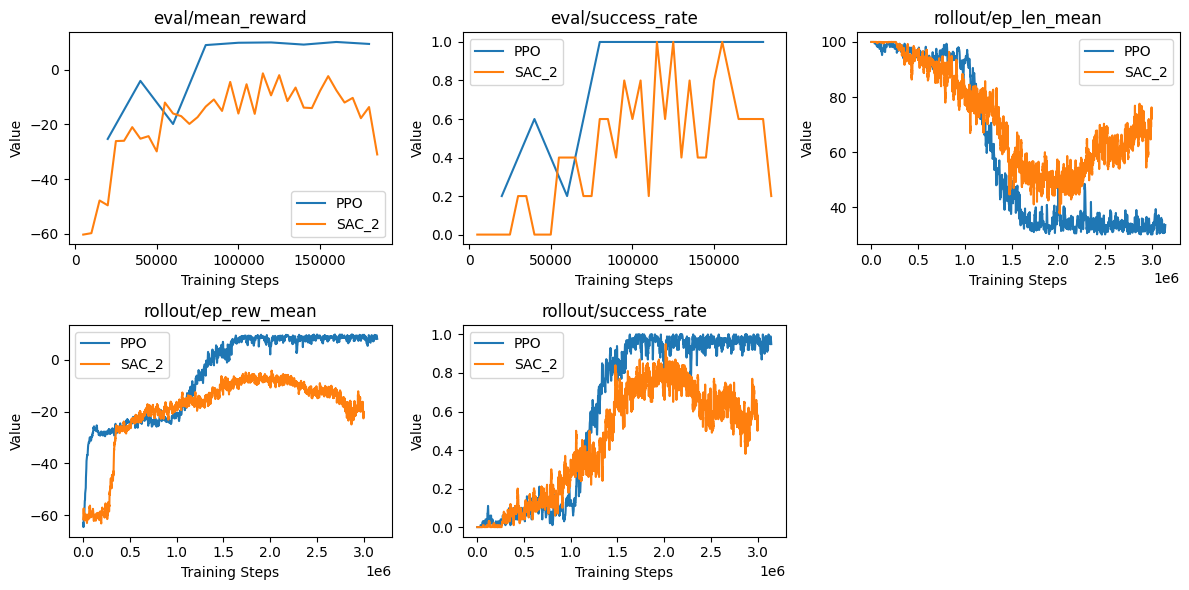

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorboard.backend.event_processing import event_accumulator
import glob

def extract_tensorboard_data(log_dir):
    """
    Extract data from TensorBoard log files without requiring TensorFlow.

    Args:
        log_dir: Path to the directory containing the TensorBoard log files

    Returns:
        A dictionary of pandas DataFrames for each tag in the log files
    """
    # Find event files in the directory
    event_files = glob.glob(os.path.join(log_dir, "events.out.tfevents.*"))

    if not event_files:
        raise FileNotFoundError(f"No TensorBoard event files found in {log_dir}")

    print(f"Found {len(event_files)} event file(s)")

    # Load the event data
    ea = event_accumulator.EventAccumulator(
        log_dir,
        size_guidance={
            event_accumulator.SCALARS: 0,  # Extract all scalar values
            event_accumulator.HISTOGRAMS: 0,
            event_accumulator.IMAGES: 0,
            event_accumulator.AUDIO: 0,
            event_accumulator.TENSORS: 0,
        }
    )
    ea.Reload()  # Load all data

    # Get list of tags (metrics)
    tags = ea.Tags()['scalars']
    print(f"Available tags/metrics: {tags}")

    # Create a dictionary to store DataFrames for each tag
    data_frames = {}

    # Extract scalar values for each tag
    for tag in tags:
        events = ea.Scalars(tag)

        # Extract step, value, and wall_time
        steps = [event.step for event in events]
        values = [event.value for event in events]
        wall_times = [event.wall_time for event in events]

        # Create DataFrame
        df = pd.DataFrame({
            'step': steps,
            'value': values,
            'wall_time': wall_times
        })

        # Store in dictionary
        data_frames[tag] = df

    return data_frames

log_dir = "./runs"
# log_dir = "/content/drive/MyDrive/Colab Notebooks/Robotique/runs"

# Extract data
runs_data = {}
wanted_metrics = ['eval/mean_reward', 'eval/success_rate', 'rollout/ep_len_mean', 'rollout/ep_rew_mean', 'rollout/success_rate']
for run in os.listdir(log_dir):
    run_dir = os.path.join(log_dir, run)
    if os.path.isdir(run_dir):
        print(f"Processing run: {run}")
        data_frames = extract_tensorboard_data(run_dir)
        runs_data[run] = {metric: data_frames[metric] for metric in wanted_metrics if metric in data_frames}


# Plot the metrics for both runs
figure = plt.figure(figsize=(12, 6))
for i, metric in enumerate(wanted_metrics):
    ax = figure.add_subplot(2, 3, i+1)
    for run_name, run_data in runs_data.items():
        if metric in run_data:
            df_metric = run_data[metric]
            ax.plot(df_metric['step'], df_metric['value'], label=run_name)
    ax.set_title(metric)
    ax.set_xlabel("Training Steps")
    ax.set_ylabel("Value")
    ax.legend()
plt.tight_layout()
plt.show()

We can see that the agent train with PPO performs much better because of its more advanced reward design. However, the simple agent is still performing quite good as it reached 0.9 of success rate. For the rest of this project, we will use the agent train with PPO, with the advanced reward design.

In [4]:
import gym
import numpy as np
import pybullet as p
import pybullet_data
import imageio
import base64
import io
import tempfile

from IPython.display import HTML, display, Video
from stable_baselines3 import PPO, SAC
from roboto import MultiChestKukaEnv

def test_robot_policy(
    chest_idx=0,
    model_path="best_model_by_success",
    reward_type='advanced',
    model_type='PPO',
    max_steps=200,
    num_chests=3
):
    """
    - chest_idx : index of the chest to target (0, 1, 2, ...).
    - model_path : path to the trained model (PPO.load or SAC.load file).
    - max_steps : maximum number of steps to simulate.
    - num_chests : number of chests in the environment.
    """

    env = MultiChestKukaEnv(reward_type=reward_type, num_chests=num_chests, use_gui=False)

    if model_type == 'PPO':
        model = PPO.load(model_path)
    elif model_type == 'SAC':
        model = SAC.load(model_path)

    obs, info = env.reset(seed=42)

    env.target_idx = chest_idx

    for i, cid in enumerate(env.chest_ids):
        if i == chest_idx:
            p.changeVisualShape(cid, -1, rgbaColor=[1, 0, 0, 1])  # red
        else:
            p.changeVisualShape(cid, -1, rgbaColor=[1, 1, 1, 1])  # white

    frames = []
    done = False
    truncated = False
    step_count = 0

    while not done and not truncated and step_count < max_steps:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)

        frame = env.render(mode="rgb_array")
        if frame is not None:
            frames.append(frame)

        step_count += 1

    # Save the collected frames as an mp4 video file
    temp_video_file = tempfile.NamedTemporaryFile(suffix=".mp4", delete=False)
    temp_video_path = temp_video_file.name
    temp_video_file.close()
    imageio.mimwrite(temp_video_path, frames, fps=30, format='FFMPEG')

    # Use an interactive video player to display the video
    display(Video(temp_video_path, embed=True, width=600, height=400))

    env.close()

reward_type = "basic"
model_type = "SAC"
num_chests = 3
print(f"Testing the best {model_type} model trained with {reward_type} reward")
test_robot_policy(chest_idx=1, model_path="best_model_by_success_SAC.zip", reward_type=reward_type, model_type=model_type, max_steps=200, num_chests=3)

# reward_type = "advanced"
# model_type = "PPO"
# num_chests = 3
# print(f"Testing the best {model_type} model trained with {reward_type} reward")
# test_robot_policy(chest_idx=1, model_path="best_model_by_success.zip", reward_type=reward_type, model_type=model_type, max_steps=200, num_chests=3)


Testing the best SAC model trained with basic reward


Lossy conversion from int32 to uint8. Range [0, 249]. Convert image to uint8 prior to saving to suppress this warning.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (480, 360) to (480, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
Lossy conversion from int32 to uint8. Range [0, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 250]. Convert image to uint8 prior to

Above, we can see visualisations for both agent. We can see that are both able to reach the red chest ( the target).

## 2. "Open the Chests" Environment

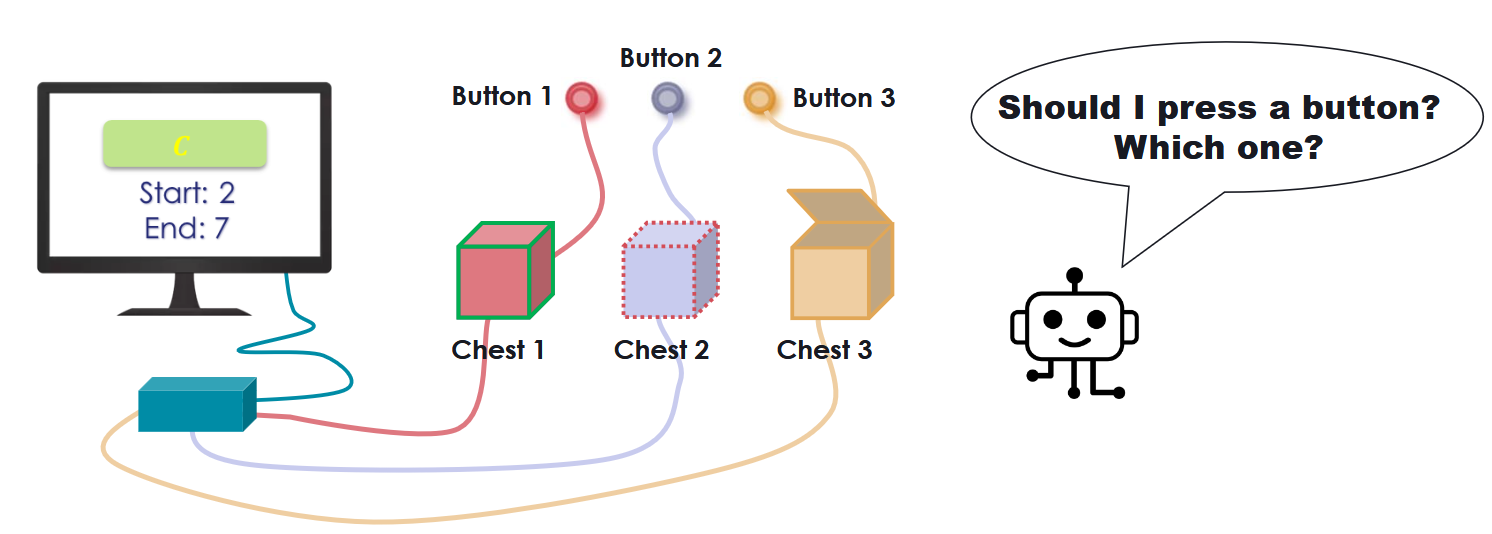

The **Open the Chests** environment introduces **event-driven decision-making**, where the robot must **recognize patterns in an event stream** and take the appropriate action. The environment simulates a scenario where **various activities generate a stream of events**, each representing a **significant observation**.

The robot's goal is to:
- **Recognize event signatures** in the stream.
- **Associate events with specific activities**.
- **Use this information to open the correct chest** by taking the appropriate action (e.g., pressing a button).

This requires the robot to **learn how to interpret event sequences** and **respond accordingly**.


### **Challenge**
The key difficulty in this environment is handling **asynchronous and sequential events**. The robot must:
- **Interpret real-time event streams** where new information continuously arrives.
- **Recognize patterns** in events occurring at different points in time.
- **Distinguish relevant events** from noise in the event stream.
- **Identify and execute the correct action** based on learned patterns.

As event sequences become more **complex and interdependent**, the learning problem shifts from a simple **one-to-one mapping** to a **time-dependent decision-making** challenge.

### **Suggested Approach**
The **solution** to this problem can be approached at **multiple levels of complexity**:

#### **1. Simple Approach: Single Event Mapping**
- **Use a basic RL agent** that **associates the last seen event with a specific action**.
- The agent learns to **map a single event to an action** (e.g., pressing a button to open a chest).
- **Limitations:**  
  - Cannot handle **complex sequences** where multiple events must be considered.  
  - **Fails** if event history is required to make decisions.

#### **2. Intermediate Approach: Temporal Windows**
- Implement a **time window** where the agent **stores and analyzes recent events**.
- The agent can **recognize simple event sequences** by considering a **short history**.
- **Improvement over single-event mapping**, but still struggles with **long-range dependencies**.

#### **3. Advanced Approach: Transformers or Reccurence for Temporal Dependencies**
- **Utilize deep learning techniques** such as:
  - **Recurrent Neural Networks (RNNs)**
  - **Long Short-Term Memory (LSTMs)**
  - **Transformers (e.g., GPT or BERT-like models)**
- These models allow the agent to:
  - **Process complex event sequences** spanning many steps.
  - **Learn temporal relationships** and **predict upcoming events**.
  - **Generalize across different event patterns** instead of memorizing specific cases.




Step 1: Action=0, Reward=0, Done=False
Step 2: Action=0, Reward=0, Done=False
Step 3: Action=0, Reward=-1, Done=False
Step 4: Action=1, Reward=-1, Done=False
Step 5: Action=1, Reward=-1, Done=False
Step 6: Action=0, Reward=-1, Done=False
Step 7: Action=1, Reward=-1, Done=False
Step 8: Action=1, Reward=-1, Done=False
Step 9: Action=1, Reward=1, Done=True
Environment reached a terminal state. Resetting...
Step 10: Action=0, Reward=0, Done=False


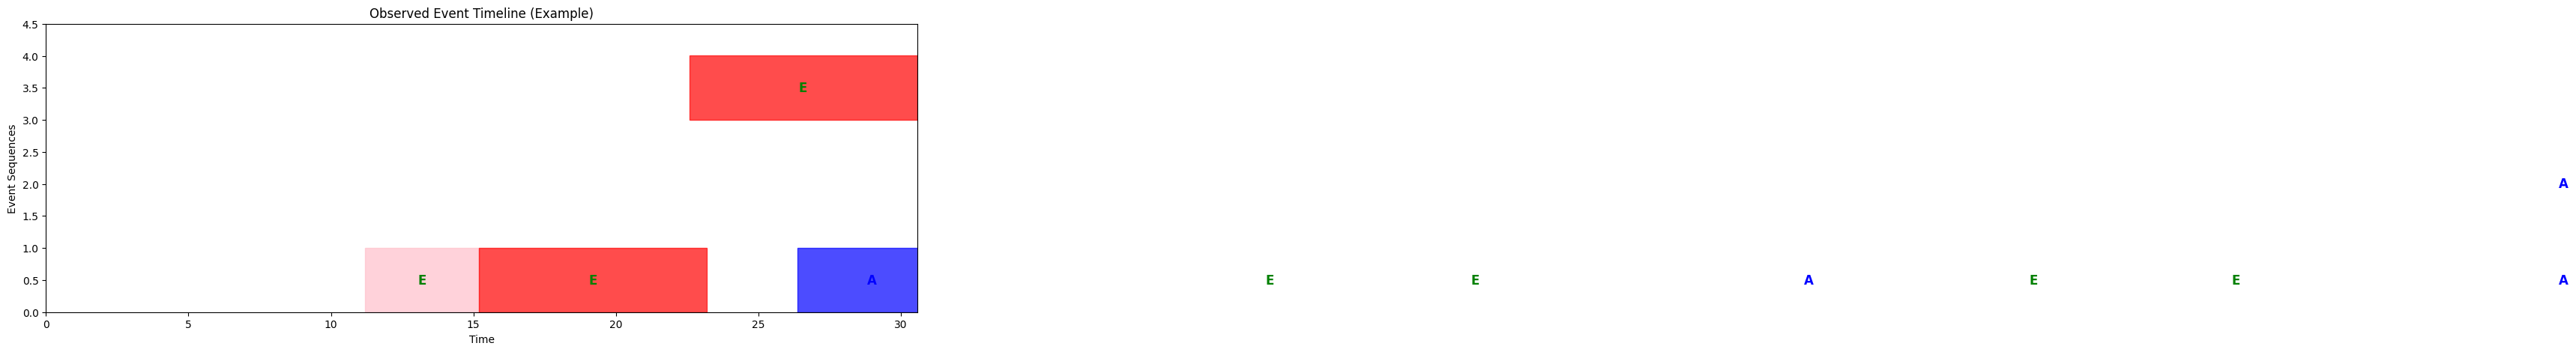

In [2]:
# ------------------------------------------------------------------------------
# OpenTheChestsGym Environment Interaction & Event Visualization
# ------------------------------------------------------------------------------
# This script demonstrates:
# - How to initialize and interact with the OpenTheChestsGym environment.
# - How to extract event data from the environment.
# - How to visualize observed events in a timeline.
#
# The script follows these steps:
# 1. Define event types, attributes, and instructions.
# 2. Initialize the environment with the given configuration.
# 3. Run a loop to collect events while interacting with the environment.
# 4. Visualize the collected events using a timeline plot.
# ------------------------------------------------------------------------------

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gym
from openthechests.src.OpenTheChestsGym import OpenTheChestsGym

# --------------------------------------------------------
# INITIALIZE THE ENVIRONMENT
# --------------------------------------------------------

# Define the list of event types and their attributes
all_event_types = ['A', 'B', 'C', 'D', 'E']
all_event_attributes = {
    'fg': ['red', 'blue', 'green', 'orange', 'pink'],
    'bg': ['red', 'blue', 'green', 'orange', 'pink']
}

# Define noise event types and attributes
all_noise_types = ['G', 'H', 'F']
all_noise_attributes = {
    'fg': ['yellow', 'purple', 'black'],
    'bg': ['yellow', 'purple', 'black']
}

# Define event instructions (simulating sequences of actions and dependencies)
instructions = [
    [
        {'command': 'delay', 'parameters': 10},
        {'command': 'instantiate', 'parameters': ('A', {'bg': 'blue', 'fg': 'blue'}, {'mu': 5, 'sigma': 2}), 'variable_name': 'distinct'},
        {'command': 'instantiate', 'parameters': ('E', {'bg': 'pink', 'fg': 'green'}, {'mu': 6, 'sigma': 2}), 'variable_name': 'e1'},
        {'command': 'instantiate', 'parameters': ('E', {'bg': 'red', 'fg': 'green'}, {'mu': 8, 'sigma': 0}), 'variable_name': 'e2'},
        {'command': 'met_by', 'parameters': ['e2', 'e1'], 'variable_name': 'e2', 'other': {}},
        {'command': 'after', 'parameters': ['distinct', 'e2'], 'variable_name': 'distinct', 'other': {'gap_dist': {'mu': 4, 'sigma': 1}}}
    ]
]

# Initialize the OpenTheChestsGym environment
env = OpenTheChestsGym(instructions=instructions,
                       all_event_types=all_event_types,
                       all_event_attributes=all_event_attributes,
                       all_noise_types=all_noise_types,
                       all_noise_attributes=all_noise_attributes,
                       verbose=False,
                       discrete=True, # If True actions are discrete, meaning that an action corresponds to the number of the box to open.
                                       # If False actions are binary vectors, meaning that a 0 at index i corresponds to pushing the buton i.
                       stb3=False)

# --------------------------------------------------------
# COLLECT EVENT OBSERVATIONS
# --------------------------------------------------------

def event_from_obs(obs):
    """
    Extracts event information from the environment observation.
    Converts indices into human-readable symbols and colors.
    """
    event = obs["context"]
    return {
        "symbol": all_event_types[event.type],  # Convert event index to actual event type
        "bg_color": all_event_attributes["bg"][event.attributes["bg"]],  # Convert bg index to color
        "symbol_color": all_event_attributes["fg"][event.attributes["fg"]],  # Convert fg index to color
        "start_time": event.start,
        "end_time": event.end
    }

# Store observed events
observed_events = []

# Reset environment and initialize observation
obs = env.reset()
observed_events.append(event_from_obs(obs))

# Run simulation loop to collect events
for step in range(10):
    #action = 0  # Fixed action (Can be randomized using env.action_space.sample())
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)  # Take a step in the environment

    # Extract event from `obs["context"]`
    if "context" in obs and obs["context"] is not None:
        observed_events.append(event_from_obs(obs))

    print(f"Step {step+1}: Action={action}, Reward={reward}, Done={done}")

    if done:
        print("Environment reached a terminal state. Resetting...")
        obs = env.reset()

# --------------------------------------------------------
# VISUALIZE EVENT SEQUENCES
# --------------------------------------------------------

def draw_event_sequence_matplot(events, start_time=0, end_time=50, env_name = "Example"):
    """
    Visualizes the observed event sequence as a timeline, showing event occurrences over time.
    """
    # Create the figure and axis with a larger width
    fig, ax = plt.subplots(figsize=(15, 5))  # Increased width from 10 to 15

    last_event_end_times = []  # Track end times to avoid overlapping
    height = 1  # Height of each event bar

    for event in events:
        event_name = event["symbol"]
        start = event["start_time"]
        end = event["end_time"]
        color = event["bg_color"]
        text_color = event["symbol_color"]

        # Find the correct row for the event (avoid overlapping)
        line = 0
        while line < len(last_event_end_times):
            if start >= last_event_end_times[line]:  # If space is available in this line
                break
            line += 1
        if line == len(last_event_end_times):
            last_event_end_times.append(end)
        else:
            last_event_end_times[line] = end

        # Draw the event as a rectangle
        y_pos = line * (height + 0.5)
        rect = patches.Rectangle((start, y_pos), max(end - start, 0.1), height, color=color, alpha=0.7)  # Ensure non-zero width
        ax.add_patch(rect)

        # Label the event in the center of the rectangle
        ax.text(start + (end - start) / 2, y_pos + height / 2, event_name,
                horizontalalignment='center', verticalalignment='center',
                color=text_color, fontsize=12, fontweight='bold')

    # Set limits and labels
    ax.set_xlim(start_time, end_time)
    ax.set_ylim(0, len(last_event_end_times) * (height + 0.5))
    ax.set_xlabel("Time")
    ax.set_ylabel("Event Sequences")
    ax.set_title("Observed Event Timeline " + f'({env_name})')
    plt.show()


# Call the function to plot the observed event sequence
draw_event_sequence_matplot(observed_events, start_time=0, end_time=observed_events[-1]["end_time"])

# Close the environment
env.close()

### **Configurations**
The complexity of the problem can be adjusted based on how events are structured and how much information the robot must process. Below are the **four defined environments** with increasing levels of difficulty.

#### **1. Easy: 3 Chests, 1 Event Per Chest** (`OpenTheChests-v0`)
- Each **chest is associated with a single event**.
- The robot **only needs to react to a single event** to identify the correct chest.
- **No historical context or sequence tracking** is required.
- **Challenge Level: Minimal** – A simple one-to-one mapping between an event and an action.
- Example:
  - **Event A** → Open **Chest 1**  
  - **Event B** → Open **Chest 2**  
  - **Event C** → Open **Chest 3**  

#### **2. Medium: 3 Chests, 4 Events Per Chest** (`OpenTheChests-v1`)
- Each chest is associated with **a sequence of 4 events**.
- The robot **must recognize short event sequences** to determine the correct chest.
- **Some memory and sequence tracking** are required.
- **Challenge Level: Moderate** – The robot must understand simple temporal dependencies.
- Example:
  - **Event A → Event B → Event C → Event D** → Open **Chest 1**  
  - **Event X → Event Y → Event Z → Event W** → Open **Chest 2**  
  - **Event M → Event N → Event O → Event P** → Open **Chest 3**  

#### **3. Hard: 3 Chests, 16 Events Per Chest** (`OpenTheChests-v2`)
- Each chest is associated with a **complex sequence of 16 events**.
- The robot **must track long-term dependencies** between events.
- **Deep memory and advanced pattern recognition** are necessary.
- **Challenge Level: High** – The robot must handle **complex sequential dependencies** and **avoid distractions**.
- Example:
  - **Event red A → after blue B → during C → after D → ... → Event P** → Open **Chest 1**  
  - **Event X → during red Y → after pink Z → during W → ... → Event O** → Open **Chest 2**  
  - **Event M → met_by N → during O → after P → ... → Event R** → Open **Chest 3**  

### **Testing Different Complexity Levels**
These three configurations allow testing the **robot’s ability to recognize patterns** in **low, medium, and high complexity cases**.

- **In the Easy environment**, the agent can use **basic reinforcement learning** to associate a **single event** with the correct action.
- **In the Medium environment**, the agent can use **simple memory storage** to correctly identify **event patterns**.
- **In the Hard environment**, the agent requires **advanced memory mechanisms (LSTMs, Transformers, or Attention-based models)** to detect **long event sequences**.

This setup allows for a **progressive increase in difficulty**, helping to evaluate **how different agents perform at various levels of complexity**.


In [3]:
from register_envs import all_types, all_attributes, register_custom_envs

def event_from_obs_gym(obs, types, attributes):
    """
    Extracts event information from the environment observation.
    Converts indices into human-readable symbols and colors.
    """
    return {
        "symbol": types[obs["e_type"]],  # Convert event index to actual event type
        "bg_color": attributes["bg"][obs["bg"]],  # Convert bg index to color
        "symbol_color": attributes["fg"][obs["fg"]],  # Convert fg index to color
        "start_time": obs["start"][0],
        "end_time": obs["end"][0]
    }

register_custom_envs()

OpenTheChests-v0 reached a terminal state. Resetting...
OpenTheChests-v1 reached a terminal state. Resetting...
OpenTheChests-v1 reached a terminal state. Resetting...
OpenTheChests-v2 reached a terminal state. Resetting...


c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment OpenTheChests-v0 is out of date. You should consider upgrading to version `v2`.
  logger.warn(
c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and

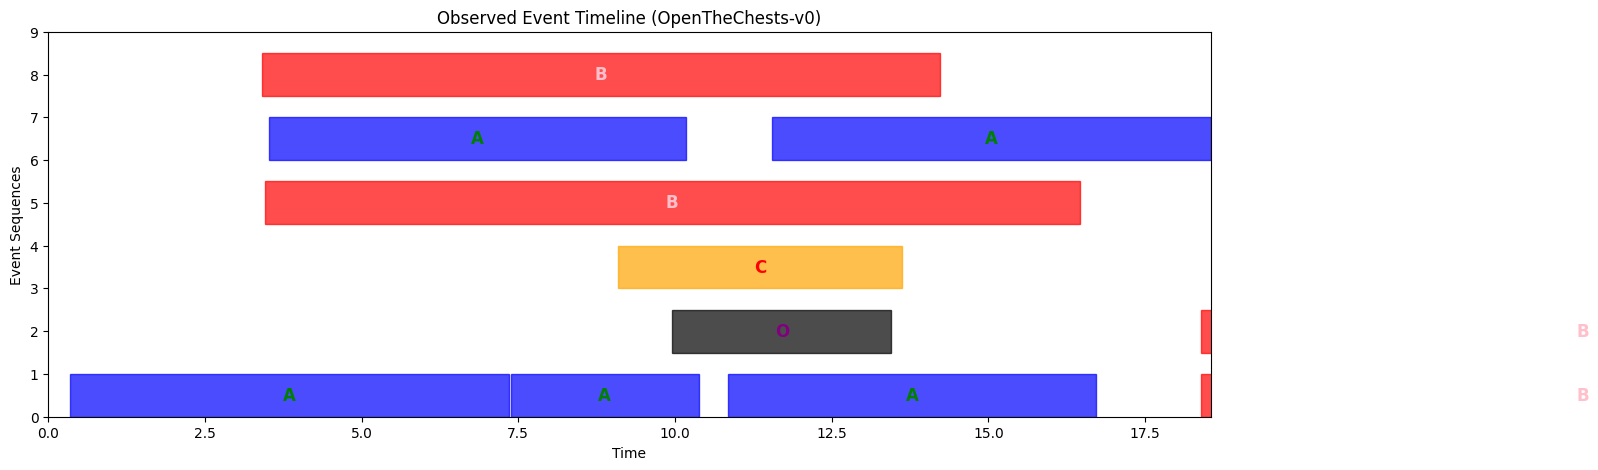

In [4]:
# --------------------------------------------------------
# COLLECT OBSERVATIONS FROM BOTH ENVIRONMENTS
# --------------------------------------------------------

def collect_observations(env_name, num_steps=30):
    """
    Collects event observations from a given OpenTheChests environment.

    Args:
        env_name (str): The registered environment name ("OpenTheChests-v0" or "OpenTheChests-v1").
        num_steps (int): Number of observations to collect.

    Returns:
        list: Collected event observations.
    """

    # Create the environment
    env = gym.make(env_name)

    # Store observed events
    observed_events = []

    # Reset environment and initialize observation
    obs = env.reset()
    observed_events.append(event_from_obs_gym(obs, all_types, all_attributes))

    # Run simulation loop to collect events
    for step in range(num_steps):
        #action = [0] * env.action_space.n  # Fixed action (Can be randomized using env.action_space.sample())
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)  # Take a step in the environment

        # Extract event information
        observed_events.append(event_from_obs_gym(obs, all_types, all_attributes))

        # print(f"Step {step+1} ({env_name}): Action={action}, Reward={reward}, Done={done}")

        if done:
            print(f"{env_name} reached a terminal state. Resetting...")
            obs = env.reset()

    # Close the environment
    env.close()

    return observed_events

# Collect data from both environments
observed_events_easy = collect_observations("OpenTheChests-v0", num_steps=10)
observed_events_medium = collect_observations("OpenTheChests-v1", num_steps=50)
observed_events_hard = collect_observations("OpenTheChests-v2", num_steps=100)

# --------------------------------------------------------
# VISUALIZE EVENT SEQUENCES
# --------------------------------------------------------

# Visualize collected observations sequentially
draw_event_sequence_matplot(observed_events_easy, start_time=0, end_time=observed_events_easy[-1]["end_time"], env_name="OpenTheChests-v0")
#draw_event_sequence_matplot(observed_events_medium, start_time=0, end_time=observed_events_medium[-1]["end_time"], env_name="OpenTheChests-v1")
#draw_event_sequence_matplot(observed_events_hard, start_time=0, end_time=observed_events_hard[-1]["end_time"], env_name="OpenTheChests-v2")


## Simple Case -> Action mapping

Using a Q table we can map last symbol to an action


In [19]:
from Agents.QLearning_agent import QLearningAgent
import gym
from openthechests.src.OpenTheChestsGym import OpenTheChestsGym


env = gym.make("OpenTheChests-v0")
agent = QLearningAgent(env, all_types=all_types, all_attributes=all_attributes)
#agent.train(num_episodes=100)
#agent.save('agent_QLearning.pkl')
agent = agent.load('OTC_models/agent_QLearning.pkl')
#agent.test(num_episodes=1)

print('\n\n############ Q Table ############\n\n')
agent.print_q_table()





print('\n\n############ Testing ############\n\n')

obs = agent.env.reset()
done = False
episode_reward = 0

current_symbol = agent._get_symbol_from_obs(obs)

while not done:
    # Choix de l'action de façon purement greedye (Q-max)
    action_idx = np.argmax(agent.q_table[current_symbol])
    action = agent.action_set[action_idx]

    next_obs, reward, done, info = agent.env.step(action)
    episode_reward += reward

    print(f"Event: {current_symbol}, Action: {action}, Reward: {reward}")

    current_symbol = agent._get_symbol_from_obs(next_obs)

print(f"Episode terminé avec un total de reward : {episode_reward}")



############ Q Table ############


Symbol: A, Q-values: [-4.96434725e-03 -1.78689849e-02 -1.58750299e-02 -2.08485180e-02
  8.89998614e-02  9.89989120e-07  7.50042622e-05 -2.98809319e-03]
Symbol: B, Q-values: [-0.00396933 -0.00986439  0.08684933  0.         -0.00791235 -0.00299802
  0.         -0.00396934]
Symbol: C, Q-values: [-9.97029053e-04  8.86735726e-02 -5.93689151e-03  3.95404025e-06
 -9.93295263e-03  1.28391738e-05 -5.98808460e-03 -1.94374028e-03]
Symbol: D, Q-values: [0. 0. 0. 0. 0. 0. 0. 0.]
Symbol: E, Q-values: [0. 0. 0. 0. 0. 0. 0. 0.]
Symbol: F, Q-values: [0. 0. 0. 0. 0. 0. 0. 0.]
Symbol: G, Q-values: [0. 0. 0. 0. 0. 0. 0. 0.]
Symbol: H, Q-values: [0. 0. 0. 0. 0. 0. 0. 0.]
Symbol: I, Q-values: [0. 0. 0. 0. 0. 0. 0. 0.]
Symbol: J, Q-values: [0. 0. 0. 0. 0. 0. 0. 0.]
Symbol: K, Q-values: [ 0.00016119  0.          0.         -0.002       0.          0.
  0.          0.        ]
Symbol: L, Q-values: [ 0.00077854  0.          0.         -0.00399305 -0.00099802  0.
  0.       

## Medium Case -> PPO with window

Here  we have to use a memory window and use the start and end time as features if possible

In [ ]:
import gym
from collections import deque
import numpy as np
from Env_Wrappers.TimeWindowWrapper import TimeWindowWrapper
"""
env = gym.make("OpenTheChests-v1")

wrapped_env = TimeWindowWrapper(env, window_size=6, types = all_types, attributes=all_attributes)

# Then train your agent (e.g. Stable Baselines3)
from stable_baselines3 import PPO

model = PPO("MlpPolicy", wrapped_env, verbose=1, learning_rate=1e-4)
model.learn(total_timesteps=300_000)
model.save("OTC_models/ppo_medium_case")
wrapped_env.close()
"""

c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment OpenTheChests-v1 is out of date. You should consider upgrading to version `v2`.
  logger.warn(
c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIB

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.5     |
|    ep_rew_mean     | -39.9    |
| time/              |          |
|    fps             | 824      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.1        |
|    ep_rew_mean          | -36.8       |
| time/                   |             |
|    fps                  | 680         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008471571 |
|    clip_fraction        | 0.0198      |
|    clip_range           | 0.2         |
|    entropy_loss  

In [50]:
import gym
from collections import deque
import numpy as np
from Env_Wrappers.TimeWindowWrapper import TimeWindowWrapper

env = gym.make("OpenTheChests-v1")

model = PPO.load("OTC_models/ppo_medium_case.zip")  # Load saved model
wrapped_env = TimeWindowWrapper(env, window_size=6, types = all_types, attributes=all_attributes)
obs = wrapped_env.reset()
done = False
episode_reward = 0
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = wrapped_env.step(action)
    episode_reward += rewards

print(f"Episode terminé avec un total de reward : {episode_reward}")
wrapped_env.close()

Episode terminé avec un total de reward : 3


## Hard case -> Deep Q learning RNN with epsilon greedy

In [ ]:
import gym
import numpy as np

# For vectorization
from stable_baselines3.common.vec_env import DummyVecEnv
# Recurrent PPO from SB3-contrib
from sb3_contrib import RecurrentPPO
from sb3_contrib.ppo_recurrent.policies import MlpLstmPolicy
from Env_Wrappers.LSTMCompatibleWrapper import LSTMCompatibleWrapper, make_wrapped_env, PrintEpisodeRewardCallback

num_envs = 50
envs = DummyVecEnv([make_wrapped_env(all_types, all_attributes) for _ in range(num_envs)])

# ---------------------------------------------------------------------
# Create RecurrentPPO model with vectorized env
# ---------------------------------------------------------------------
model = RecurrentPPO(
    policy=MlpLstmPolicy,
    env=envs,
    learning_rate=1e-4,
    n_steps=128,
    batch_size=64,
    n_epochs=4,
    verbose=1,
    policy_kwargs={"n_lstm_layers": 2}
)

model.learn(total_timesteps=500_000, callback=PrintEpisodeRewardCallback(print_freq=50))
model.save("OTC_models/recurrent_ppo_lstm_hard_case")

c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\charl\anaconda3\envs\Robot2\lib\site-packages\gym\utils\passive_en

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 6975 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 6400 |
-----------------------------
#############################################
Episode 50 reward: -107.0
#############################################
#############################################
Episode 100 reward: -179.0
#############################################
-----------------------------------------
| time/                   |             |
|    fps                  | 525         |
|    iterations           | 2           |
|    time_elapsed         | 24          |
|    total_timesteps      | 12800       |
| train/                  |             |
|    approx_kl            | 0.007573307 |
|    clip_fraction        | 0.0804      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.07       |
|    explained_variance   | 0.0113      |
|    learning_rate        | 0.0

In [41]:
# ---------------------------------------------------------------------
# Example evaluation on a single env
# ---------------------------------------------------------------------
eval_env = gym.make("OpenTheChests-v2")
eval_env = LSTMCompatibleWrapper(eval_env, types=all_types, attributes=all_attributes)

model = RecurrentPPO.load("OTC_models/recurrent_ppo_lstm_hard_case.zip", env=eval_env)
obs = eval_env.reset()
lstm_states = None
done = False
total_reward=0
step = 0
while done == False:
    step += 1
    action, lstm_states = model.predict(obs, state=lstm_states, episode_start=done)
    obs, reward, done, info = eval_env.step(action)
    total_reward += reward
    # eval_env.render()  # if you want to visualize

eval_env.close()
print(f"Total reward: {total_reward}")
print("Number of steps: ", step)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Total reward: -29
Number of steps:  528


## 3. Combining the Two Environments

### **Objective**
The goal of this step is to **integrate robotic control** with the **Open the Chests** environment, creating a **dual-agent system** where one agent focuses on **event recognition**, and the other handles **robotic movement and task execution**.

### **Two-Agent System**
The system consists of **two specialized agents** that work together to achieve the objective:

#### **Agent 1: Event Recognition Agent**
- **Role:** Identifies when it is time to open a chest based on the observed event stream.
- **Task:** Recognizes **patterns in event sequences** and determines the correct **moment for action**.
- **Challenge:** Must handle **asynchronous event streams** and recognize **sequential dependencies**.

#### **Agent 2: Robotic Control Agent**
- **Role:** Controls the **robotic arm**, moving it to the correct chest and performing the action of opening it.
- **Task:** Receives signals from **Agent 1**, executes movement, and performs the physical **interaction with the chest**.
- **Challenge:** Accurately **execute motor control** and properly **coordinate** with **Agent 1**.

### **Goal**
The **dual-agent system** must function **cooperatively**, where:
- **Agent 1** handles **activity recognition** and determines when a chest should be opened.
- **Agent 2** receives the **signal from Agent 1**, moves the **robotic arm**, and executes the **chest-opening action**.

### **Suggested Approach**
To effectively **solve this problem**, the following **strategy** is recommended:

1. **Event Recognition (Agent 1)**
   - **Process the event stream** using a suitable pattern recognition method.
   - Possible techniques include:
     - **Temporal Windows** – Track events over a time window to detect relevant sequences.
     - **Transformers / LSTMs** – Use deep learning models to analyze complex event dependencies.
   - Once a **chest-opening pattern** is detected, **send a signal** to Agent 2.

2. **Robotic Control (Agent 2)**
   - **Receive the signal** from Agent 1.
   - Move the **robotic arm** to the identified chest.
   - Perform the **physical interaction**.
   - Confirm the **completion of the task** to the Open the Chests (OtC) environment.

3. **Cycle Reset & Continuation**
   - After the chest is opened:
     - **Agent 1 resumes event observation** to detect the next relevant sequence.
     - The **robot arm may reset** to an initial position before processing the next task.
   - The cycle repeats, allowing for **continuous operation**.


In [ ]:
physical_env = MultiChestKukaEnv()

## **Project Submission Guidelines**

### **What to Submit**
You must submit the following items:

1. **A Jupyter Notebook (`.ipynb`)**
   - The notebook **should not contain the full code** but must be **sufficient to run and understand the project**.
   - It must:
     - **Use the project's modules** (e.g., import the environment and agent implementations).
     - Load and use the **trained model weights** to demonstrate the trained agent's performance.
     - Include **high-level explanations**.
     - Include **visualizations** (e.g., training progress, rewards, robot interactions).
     - Provide **analysis and comments** on the results.

2. **Trained Model Weights**
   - Submit the saved model weights in an appropriate format (e.g., `.zip`, `.pth`, `.h5`).
   - The notebook **must load and use these weights** to showcase results.
   - Example (if using **Stable Baselines3**):
     ```python
     from stable_baselines3 import PPO
     model = PPO.load("models/trained_model.zip")  # Load saved model
     obs = env.reset()
     for _ in range(100):
         action, _states = model.predict(obs)
         obs, rewards, done, info = env.step(action)
         env.render()
     ```

3. **Data Files (if applicable)**
   - Any relevant logs, statistics, or experiment results.
   - CSV, JSON, or structured logs containing training/simulation data.
   - Project folders with python modules.
